# Intuit Quickbooks Upgrade

* Team-lead GitHub userid: rsm-israthi
* Group name:
* Team member names:
    - Isha Rathi
    - Aashvi Trivedi
    - Rishabh Soni
    - Nivan Vora
    

## Setup

Please complete this python notebook with your group by answering the questions in `intuit_quickbooks-msba.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done. Before the deadline, make sure to connect the GitHub repo to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the first group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [1]:
import pandas as pd
import pyrsm as rsm
from utils import functions

In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_parquet("data/intuit75k.parquet")
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [4]:
rsm.md("data/intuit75k_description.md")

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.parquet` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software.

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from "Intuit Direct". Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case pdf. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip5: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: Gender Identity "Female", "Male", or "Unknown"
* bizflag: Business Flag. Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for test sample

In [ ]:
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [6]:
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [7]:
# show the content of another notebook
rsm.md_notebook("./sub-notebooks/question1.ipynb")


```python
clf = rsm.model.logistic(
    data=intuit75k.query("training == 1"),
    rvar="res1",
    lev="Yes",
    evar=["numords", "version1", "upgraded"],
)
clf.summary()
```


In [8]:
# run python code from another notebook
%run ./sub-notebooks/question1.ipynb

Logistic regression (GLM)
Data                 : Not provided
Response variable    : res1
Level                : Yes
Explanatory variables: numords, version1, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.016  -98.4%        -4.13      0.050  -81.923  < .001  ***
numords    1.352   35.2%         0.30      0.015   20.314  < .001  ***
version1   2.113  111.3%         0.75      0.051   14.634  < .001  ***
upgraded   2.628  162.8%         0.97      0.049   19.705  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.041
Pseudo R-squared (McFadden adjusted): 0.041
Area under the RO Curve (AUC): 0.659
Log-likelihood: -9630.543, AIC: 19269.086, BIC: 19304.56
Chi-squared: 828.558, df(3), p.value < 0.001 
Nr obs: 52,500


DATA CLESNING

Dividing the dataset into testing and training based on the "training" column.

In [4]:

train_df = intuit75k[intuit75k['training'] == 1]
test_df = intuit75k[intuit75k['training'] == 0]


This transformation allows the model to recognize zip_bins as a categorical feature rather than treating it as a continuous numerical variable.

In [ ]:
intuit75k['zip_bins'] = intuit75k['zip_bins'].astype('category')
intuit75k.dtypes

id               int32
zip5            object
zip_bins      category
sex           category
bizflag          int32
numords          int32
dollars        float64
last             int32
sincepurch       int32
version1         int32
owntaxprod       int32
upgraded         int32
res1          category
training         int32
res1_yes         int64
dtype: object

There are no missing values.

In [6]:

missing_values = intuit75k.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


#### LOGISTIC REGRESSION

We tried the models with a combination of different variables and found that bizflaz and sex have no significant imapct on the model and hence we removed them.
The model with the following independent variables was found to be the best:
["zip_bins",  "numords", "dollars", "last", "version1", "owntaxprod", "upgraded"]

### Multicolinearily Analysis
We found some corelation between "last" and "sincepurch". Therefore we omitted sincepurch.

### Model Performance Metrics
- Pseudo R² (McFadden) = 0.114 - Indicates a moderate model fit, with values above 0.1 considered good for classification.
- AUC = 0.755 - Confirms strong predictive power, effectively distinguishing responders from non-responders.

In [7]:
logit_model = rsm.model.logistic(
    data=intuit75k.query("training == 1"),  
    rvar="res1",
    lev="Yes",
    evar= ["zip_bins",  "numords", "dollars", "last", "version1", "owntaxprod", "upgraded"],
)

logit_model.summary(vif = True)

Logistic regression (GLM)
Data                 : Not provided
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, dollars, last, version1, owntaxprod, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

                 OR     OR%  coefficient  std.error  z.value p.value     
Intercept     0.181  -81.9%        -1.71      0.075  -22.724  < .001  ***
zip_bins[2]   0.148  -85.2%        -1.91      0.110  -17.300  < .001  ***
zip_bins[3]   0.118  -88.2%        -2.14      0.121  -17.709  < .001  ***
zip_bins[4]   0.136  -86.4%        -2.00      0.112  -17.806  < .001  ***
zip_bins[5]   0.116  -88.4%        -2.15      0.120  -17.894  < .001  ***
zip_bins[6]   0.127  -87.3%        -2.07      0.115  -18.042  < .001  ***
zip_bins[7]   0.121  -87.9%        -2.11      0.117  -17.974  < .001  ***
zip_bins[8]   0.131  -86.9%        -2.03      0.114  -17.848  < .001  ***
zip_bins[9]   0.124  -87.6%        -2.09  

### Key Variable Interpretations (Feature Selection)
1. zip_bins: Geographic location significantly influences response probability, with some areas showing lower likelihoods of responding.
2. numords: More past orders correlate with a higher response rate, indicating greater customer engagement.
3. dollars: Past spending has a minor positive effect, suggesting spending alone does not strongly predict response.
4. last: A negative coefficient indicates that the longer the time since the last purchase, the lower the likelihood of responding.
5. version1: Customers using QuickBooks Version 1 are significantly more likely to upgrade than Version 2 users.
6. owntaxprod: Businesses that own tax products are more likely to upgrade, showing cross-product engagement.
7. upgraded: Previously upgraded customers are much more likely to upgrade again.


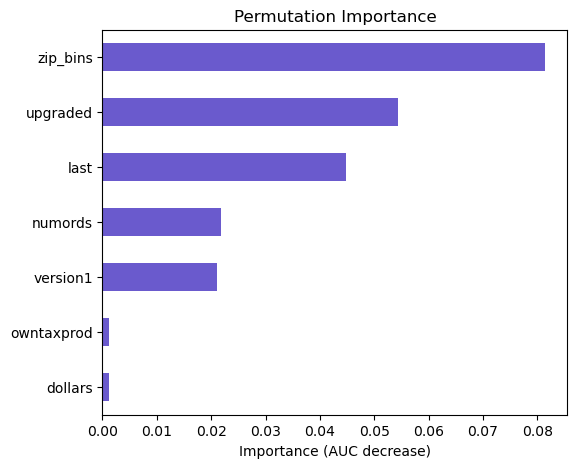

In [8]:
logit_model.plot("vimp")

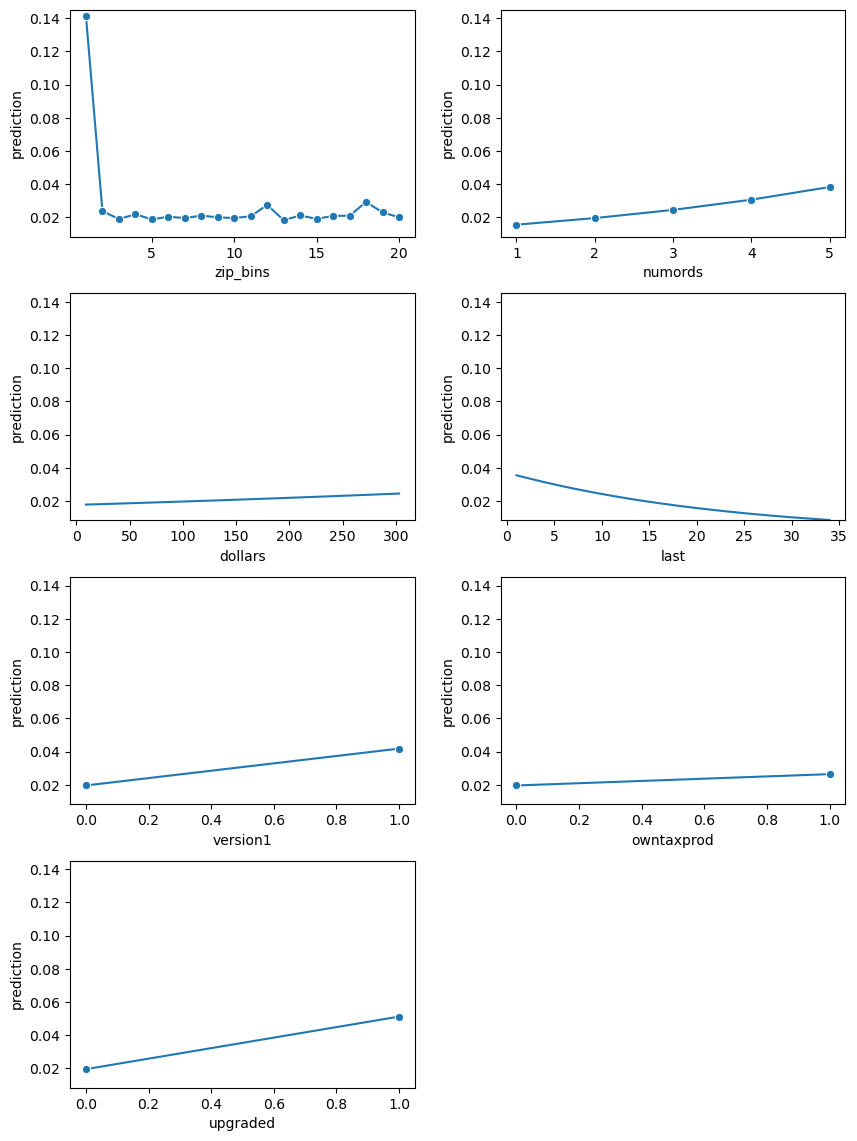

In [9]:
logit_model.plot("pred")

In [55]:
intuit75k["pred_logit"] =  logit_model.predict(intuit75k)['prediction']
intuit75k.head()

,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_logit,pred_nn
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0,0.045480,0.034657
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463,0.029437
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893,0.077563
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0,0.099972,0.169636
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831,0.030065


## Gains Curve (Logistics Regression)

The gains chart and table clearly show that our model effectively identifies businesses most likely to respond in Wave-2. From the table, we can see that by mailing only the top 30% of predicted responders, we capture nearly 67% of actual responders, which is a huge improvement over random selection. The gains plot further reinforces this by showing a steep rise initially, meaning our model is successfully prioritizing high-probability responders early on. 

In [56]:
gains_tab = rsm.gains_tab(
    intuit75k.query("training == 0"),
    "res1", "Yes", "pred_logit", qnt = 10
)
gains_tab

,cum_prop,cum_gains
0,0.000000,0.000000
1,0.100000,0.378966
2,0.200000,0.554850
3,0.300000,0.669084
4,0.400000,0.751587
5,0.500000,0.809610
6,0.600000,0.859474
7,0.700000,0.913871
8,0.800000,0.949229
9,0.899956,0.976428


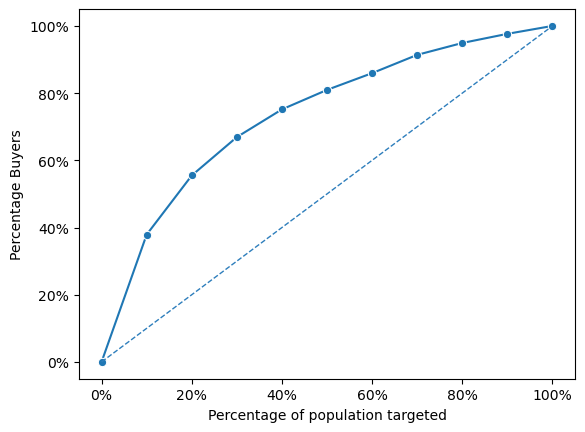

In [57]:
fig = rsm.gains_plot(
    intuit75k.query("training == 0"),
    "res1", "Yes", "pred_logit", qnt=10
)

### TESTING INTERACTIONS
Logically we thought there will be interactions between -
1. "sincepurch" and "last"- The effect of how long a customer has had QuickBooks (sincepurch) on their upgrade likelihood depends on how recently they made a purchase (last)
2. "numords" and "dollars" - The effect of total spending (dollars) on upgrade likelihood depends on purchase frequency (numords), as frequent high-spenders behave differently from occasional big spenders.
3. "sincepurch" and "version1" - The effect of how long a customer has had QuickBooks (sincepurch) on their upgrade likelihood depends on which version they are using (version1).

But these were insignificant and hence we did not include them in the model.

In [10]:
logit_model_int = rsm.model.logistic(
    data=intuit75k.query("training == 1"),  
    rvar="res1",
    lev="Yes",
    evar= ["zip_bins",  "numords", "dollars", "last", "version1", "owntaxprod", "upgraded"],
    ivar = ["sincepurch : last", "numords : dollars", "sincepurch : version1"]
)

logit_model_int.summary(vif = True)

Logistic regression (GLM)
Data                 : Not provided
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, dollars, last, version1, owntaxprod, upgraded
Null hyp.: There is no effect of x on res1
Alt. hyp.: There is an effect of x on res1

                        OR     OR%  coefficient  std.error  z.value p.value     
Intercept            0.190  -81.0%        -1.66      0.093  -17.839  < .001  ***
zip_bins[2]          0.148  -85.2%        -1.91      0.110  -17.302  < .001  ***
zip_bins[3]          0.117  -88.3%        -2.14      0.121  -17.710  < .001  ***
zip_bins[4]          0.136  -86.4%        -2.00      0.112  -17.809  < .001  ***
zip_bins[5]          0.116  -88.4%        -2.15      0.120  -17.910  < .001  ***
zip_bins[6]          0.126  -87.4%        -2.07      0.115  -18.050  < .001  ***
zip_bins[7]          0.121  -87.9%        -2.11      0.117  -17.978  < .001  ***
zip_bins[8]          0.131  -86.9%        -2.03      0.114  

#### NEURAL NETWORKS

Base Neural Network Model Evaluation: 

A Multi-Layer Perceptron (MLP) was trained using **7 features** (`zip_bins`, `numords`, `dollars`, `last`, `version1`, `owntaxprod`, `upgraded`) with one hidden layer.

In [11]:
# Define model variables
response_var = "res1"  # Dependent variable (target)
response_level = "Yes"  # Level for the dependent variable
explanatory_vars = ["zip_bins", "numords", "dollars", "last", "version1", "owntaxprod", "upgraded"]


# Train Neural Network Model (MLP)
base_nn_model = rsm.model.mlp(
    data={"Intuit_QuickBooks": train_df},  
    rvar=response_var,  
    lev=response_level,  
    evar=explanatory_vars,
    hidden_layer_sizes=(1, ),  # Defines neurons in the hidden layer
)


base_nn_model.summary()



Multi-layer Perceptron (NN)
Data                 : Intuit_QuickBooks
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, dollars, last, version1, owntaxprod, upgraded
Model type           : classification
Nr. of features      : (7, 7)
Nr. of weights       : 8
Nr. of observations  : 52,500
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.708

Raw data             :
 zip_bins  numords  dollars  last  version1  owntaxprod  upgraded
       18        2    109.5     5         0           0         0
        1        1     22.0    17         0           0         0
        3        1     20.0    17         0           0         1
       11        1     24.5     4         1           0         0
        5        3     73.5    10         0        

### K Cross 5 Fold Cross Validation

To optimize the neural network model, we performed hyperparameter tuning using `GridSearchCV`. The goal was to find the best hidden layer configuration that maximizes the AUC score and prevents the overfitting of the model.

**Performance Comparison**:
  - (5,3) performed best with AUC - 0.760
  - Other configurations had slightly lower AUC values, ranging from 0.719 to 0.758.


In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
hls = [(5, ),(5, 3), (1, 5), (1, 1), (2, 5)]

param_grid = {"hidden_layer_sizes": hls}
scoring = {"AUC": "roc_auc"}

clf_cv = GridSearchCV(
    base_nn_model.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit="AUC", verbose=5
)

In [14]:
clf_cv.fit(base_nn_model.data_onehot, base_nn_model.data.res1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=(1,),
                                     max_iter=1000000, random_state=1234,
                                     solver='lbfgs'),
             n_jobs=4,
             param_grid={'hidden_layer_sizes': [(5,), (5, 3), (1, 5), (1, 1),
                                                (2, 5)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [15]:
pd.DataFrame(clf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
1,"{'hidden_layer_sizes': (5, 3)}",0.750415,0.763111,0.769029,0.752883,0.765505,0.760188,0.007264,1
0,"{'hidden_layer_sizes': (5,)}",0.742433,0.760479,0.770095,0.751216,0.766975,0.758240,0.010208,2
4,"{'hidden_layer_sizes': (2, 5)}",0.735981,0.750669,0.760679,0.749553,0.737115,0.746800,0.009231,3
2,"{'hidden_layer_sizes': (1, 5)}",0.693481,0.700683,0.709868,0.709308,0.719745,0.706617,0.008921,4
3,"{'hidden_layer_sizes': (1, 1)}",0.693893,0.699999,0.709836,0.709431,0.719863,0.706604,0.008938,5


In [16]:
print(clf_cv.best_params_)

{'hidden_layer_sizes': (5, 3)}


### Neural Network Model Evaluation

The final model with hidden layer configuration (5,3) was evaluated on the train set. The model achieved an AUC score of 0.760, which is consistent with the cross-validation results.

**AUC = 0.765** → Indicates strong predictive power, effectively distinguishing responders from non-responders.
- **Key Feature Contributions**:
  - **zip_bins** → Most significant predictor, confirming geographic influence.
  - **last** → Negative correlation; recent purchases increase response likelihood.
  - **version1** → Version 1 users have higher response rates.
  - **upgraded** → Strongest behavioral predictor; prior upgrades increase probability.

In [17]:
# Train Neural Network Model (MLP)
nn_model = rsm.model.mlp(
    data={"Intuit_QuickBooks": train_df},  
    rvar=response_var,  
    lev=response_level,  
    evar=explanatory_vars,
    hidden_layer_sizes=(5,3),  # Defines neurons in the hidden layer
)


nn_model.summary()

Multi-layer Perceptron (NN)
Data                 : Intuit_QuickBooks
Response variable    : res1
Level                : Yes
Explanatory variables: zip_bins, numords, dollars, last, version1, owntaxprod, upgraded
Model type           : classification
Nr. of features      : (7, 7)
Nr. of weights       : 53
Nr. of observations  : 52,500
Hidden_layer_sizes   : (5, 3)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 1000000
random_state         : 1234
AUC                  : 0.765

Raw data             :
 zip_bins  numords  dollars  last  version1  owntaxprod  upgraded
       18        2    109.5     5         0           0         0
        1        1     22.0    17         0           0         0
        3        1     20.0    17         0           0         1
       11        1     24.5     4         1           0         0
        5        3     73.5    10         0     

In [60]:
intuit75k["pred_nn"] =  nn_model.predict(intuit75k)['prediction']

## Gains Curves (Neural Networks)

This gains chart evaluates the performance of a neural network model (pred_nn) in identifying businesses most likely to respond in Wave-2. The gains table shows that mailing the top 30% of predicted responders captures nearly 67.4% of actual responders, demonstrating that the model effectively ranks high-probability customers early. The gains plot confirms this by showing a steep initial rise, indicating that a small targeted mailing yields a large share of responses. Compared to a random selection (diagonal line), the model significantly outperforms, justifying its use in optimizing the mailing strategy.

In [58]:
gains_tab = rsm.gains_tab(
    intuit75k.query("training == 0"),
    "res1", "Yes", "pred_nn", qnt = 10
)
gains_tab

,cum_prop,cum_gains
0,0.0,0.000000
1,0.1,0.385313
2,0.2,0.553944
3,0.3,0.673617
4,0.4,0.751587
5,0.5,0.811423
6,0.6,0.860381
7,0.7,0.902992
8,0.8,0.950136
9,0.9,0.975521


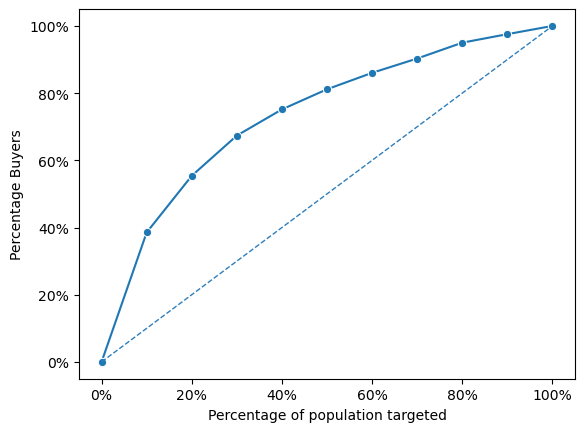

In [59]:
fig = rsm.gains_plot(
    intuit75k.query("training == 0"),
    "res1", "Yes", "pred_nn", qnt=10
)

### Predicting Probabilities for Test Set

**Key Observations**
- `pred_logit` and `pred_nn` values are generally close but show **slightly different probability distributions**.
- The **neural network model predicts slightly lower probabilities on average**, reflecting its nonlinear learning approach.
- These predictions will be used to rank businesses and select the top 22,500 for Wave-2 mailing.

By comparing these predictions, we ensure that only the **most likely responders** are included in the final mailing list, optimizing cost efficiency.


### Filtering Test set to only include the non responders in wave 1

In [20]:
filtered_test_df = test_df[test_df["res1_yes"] == 0]
filtered_test_df["pred_logit"] =  logit_model.predict(filtered_test_df)['prediction']

/tmp/ipykernel_29312/2490876433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df["pred_logit"] =  logit_model.predict(filtered_test_df)['prediction']


In [21]:
filtered_test_df["pred_nn"] =  nn_model.predict(filtered_test_df)['prediction']

/tmp/ipykernel_29312/271294584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df["pred_nn"] =  nn_model.predict(filtered_test_df)['prediction']


### Incorporating the 50% drop in response from wave 1 to wave 2

We are multiplying the probabilities by 0.5 to account for the 50% drop in response from wave 1 to wave 2 in the filtered test set.

In [22]:
filtered_test_df["wave2_pred_logit"] = filtered_test_df["pred_logit"] * 0.5
filtered_test_df["wave2_pred_nn"] = filtered_test_df["pred_nn"] * 0.5
filtered_test_df.head()

/tmp/ipykernel_29312/1749916901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df["wave2_pred_logit"] = filtered_test_df["pred_logit"] * 0.5
/tmp/ipykernel_29312/1749916901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df["wave2_pred_nn"] = filtered_test_df["pred_nn"] * 0.5


,id,zip5,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes,pred_logit,pred_nn,wave2_pred_logit,wave2_pred_nn
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0,0.024463,0.029437,0.012232,0.014718
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0,0.087893,0.077563,0.043947,0.038782
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0,0.026831,0.030065,0.013416,0.015033
6,7,22980,5,Male,0,1,49.5,13,36,1,0,0,No,0,0,0.033444,0.019184,0.016722,0.009592
8,9,34950,8,Male,0,1,44.5,15,4,0,0,0,No,0,0,0.015983,0.014632,0.007992,0.007316


#### BREAKEVEN RATE

 **Break-even Rate Interpretation**
The break-even response rate of **2.35%** indicates the **minimum predicted probability** required for a customer to be included in Wave-2 mailings. Any business with a predicted response probability **above this threshold** is expected to generate enough revenue to cover mailing costs and contribute to profitability.

In [23]:
# Given values
mailing_cost_per_business = 1.41  # Cost per mail
profit_per_responder = 60  # Profit per responder

# Calculate breakeven response rate
breakeven_response_rate = mailing_cost_per_business / profit_per_responder

# Print result
print(f"Breakeven Response Rate: {breakeven_response_rate:.2%}")


Breakeven Response Rate: 2.35%


### **Wave-1 Profit Insights**
Wave-1 mailing had a **response rate of 4.80%**, demonstrating a reasonable level of engagement. The total revenue generated significantly exceeded mailing costs, resulting in a **net profit of over $1.17 million**. The **Return on Mailing Expense (ROME) was 104.25%**, confirming that the campaign was profitable, as it returned more revenue than was spent on mailing.


In [24]:
# Given values for Wave-1
mailing_cost_per_business_wave1 = 1.41  
profit_per_responder_wave1 = 60  

total_businesses_wave1 = 801821  
total_responders_wave1 = 38487  

response_rate_wave1 = total_responders_wave1 / total_businesses_wave1
total_revenue_wave1 = total_responders_wave1 * profit_per_responder_wave1
total_mailing_cost_wave1 = total_businesses_wave1 * mailing_cost_per_business_wave1

net_profit_wave1 = total_revenue_wave1 - total_mailing_cost_wave1
rome_wave1 = (net_profit_wave1 / total_mailing_cost_wave1) * 100

# Print results
print(f"Response Rate for Wave-1: {response_rate_wave1:.2%}")
print(f"Total Revenue from Wave-1 Responders: ${total_revenue_wave1:,.2f}")
print(f"Total Mailing Cost for Wave-1: ${total_mailing_cost_wave1:,.2f}")
print(f"Net Profit from Wave-1: ${net_profit_wave1:,.2f}")
print(f"ROMEfor Wave-1: {rome_wave1:.2f}%")


Response Rate for Wave-1: 4.80%
Total Revenue from Wave-1 Responders: $2,309,220.00
Total Mailing Cost for Wave-1: $1,130,567.61
Net Profit from Wave-1: $1,178,652.39
ROMEfor Wave-1: 104.25%


## Logistic Regression Profit Analysis for Wave-2


**Selection of Businesses for Wave-2**
- We applied the break-even threshold to the test dataset to get customers with response probablities greater than the breakeven rate.
- Number of people to mail in Wave-2 (Logistic): 6179

**Expected Profit & Mailing Cost**
- Total Mailing Cost for Wave-2: **$8,712.39**  
- Expected Net Profit for Wave-2: **$8,745.23**  
- Since the **expected profit is greater than the mailing cost**, the **campaign is expected to be profitable**.

**Scaled Profit Analysis**
To estimate the impact on the larger customer base, we scaled our calculations based on the total available businesses for Wave-2 (excluding those that responded in Wave-1).  
- Total Potential Businesses for Wave-2:**763,334**  
- Scaled Net Profit (Logistic): **$311984.51**  

**Key Insights & Recommendations**
✔ **Wave-2 mailing is expected to be profitable**, reinforcing the validity of our selection criteria.  
✔ **Break-even probability ensures only high-response businesses are included**, reducing wasted mailing costs.  
✔ **Scaling calculations confirm that profitability holds even at larger mailing volumes.**  
✔ **This approach optimizes campaign efficiency and ensures a strong return on investment (ROI).**  


In [25]:
# Filter the dataframe to find the number of people to mail
people_to_mail_wave2_logit= filtered_test_df[filtered_test_df["wave2_pred_logit"] > breakeven_response_rate]

# Get the count of people to mail
num_people_to_mail_wave2_logit = people_to_mail_wave2_logit.shape[0]

# Print the result
print(f"Number of people to mail in Wave-2 (Logistic): {num_people_to_mail_wave2_logit}")

Number of people to mail in Wave-2 (Logistic): 6179


In [26]:
expected_responders_wave2_logit = num_people_to_mail_wave2_logit * people_to_mail_wave2_logit["wave2_pred_logit"].mean()
total_revenue_wave2_logit = expected_responders_wave2_logit * profit_per_responder
total_mailing_cost_wave2_logit = num_people_to_mail_wave2_logit * mailing_cost_per_business
net_profit_wave2_logit = total_revenue_wave2_logit - total_mailing_cost_wave2_logit
rome_wave2_logit = (net_profit_wave2_logit / total_mailing_cost_wave2_logit) * 100

print(f"Expected Net Profit for Wave-2 (Logistic): ${net_profit_wave2_logit:.2f}")
print(f"Total Mailing cost for Wave-2 (Logistic): ${total_mailing_cost_wave2_logit:.2f}")


Expected Net Profit for Wave-2 (Logistic): $8745.23
Total Mailing cost for Wave-2 (Logistic): $8712.39


In [61]:
#Scaled Profit
scaled_profit_logit =  net_profit_wave2_logit * ((801821-38487)/(22500-1103))

print(f"Scaled Profit (Logistic): ${scaled_profit_logit:.2f}")

Scaled Profit (Logistic): $311984.51


## Neural Network Profit Analysis for Wave-2

**Selection of Businesses for Wave-2**
- We applied the break-even threshold to the test dataset to get customers with response probabilities greater than the breakeven rate.
- Number of people to mail in Wave-2 (Logistic): 6,182

**Expected Profit & Mailing Cost**
- Expected Net Profit for Wave-2: **$9,365.50**   
- Total Mailing Cost for Wave-2: **$8,716.62**
- Since the **expected profit is greater than the mailing cost**, the **campaign is expected to be profitable**.

The Neural Network model identifies slightly more businesses to mail than Logistic Regression, potentially improving revenue.

**Scaled Profit Analysis**
To estimate the impact on the larger customer base, we scaled our calculations based on the total available businesses for Wave-2 (excluding those that responded in Wave-1).  
- Scaled Net Profit (Logistic): **$334112.59**   

**Key Insights & Recommendations**
✔ **Wave-2 mailing is expected to be profitable**, reinforcing the validity of our selection criteria.  
✔ **Break-even probability ensures only high-response businesses are included**, reducing wasted mailing costs.  
✔ **Scaling calculations confirm that profitability holds even at larger mailing volumes.**  
✔ **Neural Network predictions show slightly better profit margins, making it a strong candidate for Wave-2 selection.**


In [28]:
# Filter the dataframe to find the number of people to mail
people_to_mail_wave2_nn= filtered_test_df[filtered_test_df["wave2_pred_nn"] > breakeven_response_rate]

# Get the count of people to mail
num_people_to_mail_wave2_nn = people_to_mail_wave2_nn.shape[0]

# Print the result
print(f"Number of people to mail in Wave-2 (NN): {num_people_to_mail_wave2_nn}")

Number of people to mail in Wave-2 (NN): 6182


In [ ]:
expected_responders_wave2_nn = num_people_to_mail_wave2_nn * people_to_mail_wave2_nn["wave2_pred_nn"].mean()
total_revenue_wave2_nn = expected_responders_wave2_nn * profit_per_responder
total_mailing_cost_wave2_nn = num_people_to_mail_wave2_nn * mailing_cost_per_business
net_profit_wave2_nn = total_revenue_wave2_nn - total_mailing_cost_wave2_nn

print(f"Expected Net Profit for Wave-2 (NN): ${net_profit_wave2_nn:.2f}")
print(f"Total Mailing cost for Wave-2 (NN): ${total_mailing_cost_wave2_nn:.2f}")



Expected Net Profit for Wave-2 (NN): $9365.50
Total Mailing cost for Wave-2 (NN): $8716.62


In [38]:
#Scaled Profit
scaled_profit_nn = net_profit_wave2_nn * ((801821-38487)/(22500-1103))

print(f"Scaled Profit (NN): ${scaled_profit_nn:.2f}")


Scaled Profit (NN): $334112.59


### Conclusion

Our analysis showed that the Neural Network model outperformed Logistic Regression in terms of predictive accuracy and profitability.
Based on our optimized model, we determined the best businesses to target for Wave-2 mailings.
Out of the 22,500 customers in the test set, we selected 6,182 businesses that met the profitability threshold.
This targeted approach maximizes response rates while minimizing mailing costs, ensuring a more efficient and profitable campaign.

## *Generative AI Usage*

### Overview

In completing this assignment, our team leveraged Generative AI tools such as ChatGPT & Copilot to enhance our understanding of key concepts, troubleshoot issues, and structure our code efficiently. AI was used to clarify doubts, generate insights, and provide guidance on best practices.


#### *1. Understanding Code Structure and Best Practices*

- AI-assisted explanations helped us follow Python best practices and ensure our implementation was efficient.
- We used AI to understand the logic behind data preprocessing steps, such as one-hot encoding and feature scaling, ensuring our code was structured correctly.

#### *2. Debugging and Troubleshooting Errors*

- When implementing our machine learning models, we encountered issues with data preprocessing, such as improper feature scaling and missing value handling. AI helped identify suitable imputation techniques and preprocessing strategies.
- While tuning hyperparameters in our logistic regression model, AI guided us through understanding the trade-offs of parameters such as solver selection and regularization techniques to improve generalization.
- We faced challenges with model performance fluctuations. AI helped us analyze model diagnostics, suggesting techniques like feature selection and cross-validation to enhance stability.

#### *3. Generating Explanations for Complex Concepts*

- AI explained the significance of one-hot encoding and categorical transformations, which were crucial when handling zip_bins as categorical features in our dataset.

#### *4. Clarifying Python Libraries and Functions*

- While using sklearn for model implementation, AI helped clarify the differences between GridSearchCV and RandomizedSearchCV, guiding our approach in hyperparameter tuning.

### *Challenges and Limitations Encountered*

- At times, AI-generated responses lacked full context about our specific dataset, requiring manual validation and refinement.
- AI occasionally suggested deprecated or incompatible code, reinforcing the need for critical evaluation of responses.
- While AI was helpful in structuring our approach, we ensured that final implementations were refined based on our learning and project-specific needs.

### *How Generative AI Complemented Our Learning Process*

By using AI as a supplementary learning tool, we enhanced our problem-solving abilities, debugged efficiently, and structured our code better. This approach allowed us to work collaboratively and efficiently while ensuring we fully understood the concepts underlying our implementation.

In [48]:
import pandas as pd

# Assuming test_df is already defined and nn_model is an instance of a neural network model
test_df["pred_nn"] = nn_model.predict(test_df)['prediction']
test_df["wave2_pred_nn"] = test_df["pred_nn"] * 0.5

# Initialize mailto_wave2 with a default value
test_df["mailto_wave2"] = False  # Default value

# Use .loc for assignment based on the condition
test_df.loc[(test_df["res1"] == "No") & (test_df["wave2_pred_nn"] > breakeven_response_rate), "mailto_wave2"] = True

# Ensure the DataFrame has exactly 22,500 rows
assert len(test_df) == 22500, "Error: CSV must have exactly 22,500 rows."

# Define the correct filename format
csv_filename = "Rishabh_Isha_Aashvi_Nivan_Wave2.csv"

# Save the CSV file
test_df[["id", "mailto_wave2"]].to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' created successfully with {len(test_df)} rows!")

/tmp/ipykernel_29312/2100715565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["pred_nn"] = nn_model.predict(test_df)['prediction']
/tmp/ipykernel_29312/2100715565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["wave2_pred_nn"] = test_df["pred_nn"] * 0.5
/tmp/ipykernel_29312/2100715565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

CSV file 'Rishabh_Isha_Aashvi_Nivan_Wave2.csv' created successfully with 22500 rows!


In [49]:
x = pd.read_csv("Rishabh_Isha_Aashvi_Nivan_Wave2.csv")


In [50]:
x["mailto_wave2"].value_counts()

mailto_wave2
False    16318
True      6182
Name: count, dtype: int64